# Real-world example: ProtVec 
### University of California, Berkeley - Spring 2022

## Introduction

We introduce a new representation for biological sequences. Named bio-vectors (BioVec) to refer to biological sequences in general with protein-vectors (ProtVec) for proteins (amino-acid sequences) and gene-vectors (GeneVec) for gene sequences, this representation can be widely used in applications of deep learning in proteomics and genomics. Biovectors are basically n-gram character skip-gram wordvectors for biological sequences (DNA, RNA, and Protein). In this work, we have explored biophysical and biochemical meaning of this space. In addition, in variety of bioinformatics tasks we have shown the strength of such a sequence representation

## Download the embeddings

In [2]:
!git clone "https://github.com/ehsanasgari/Deep-Proteomics"

Cloning into 'Deep-Proteomics'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 31
Unpacking objects: 100% (34/34), done.


In [ ]:
!wget -O "Deep-Proteomics/uniref_embeddings.zip" "http://deepbio.info/uniref_embeddings.zip" 

--2021-09-07 09:25:09--  http://deepbio.info/uniref_embeddings.zip
Resolving deepbio.info (deepbio.info)... 67.20.116.206
Connecting to deepbio.info (deepbio.info)|67.20.116.206|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7505302422 (7.0G) [application/zip]
Saving to: ‘Deep-Proteomics/uniref_embeddings.zip’

dings.zip            32%[=====>              ]   2.30G  2.38MB/s    eta 48m 40s

## Pre-process the embeddings

In [1]:
import pandas as pd
from protvec.helper import preprocess_data, embed_sequence, plot_umap

In [2]:
embeddings = preprocess_data("./protvec/protVec_100d_3grams.csv") 

In [3]:
len(embeddings.keys())

9048

In [4]:
embed_sequence(embeddings, 'AAAAAAAAAAAAAAAAA', method='sum')

array([-8.703000e-01, -4.787800e-01,  2.975750e-01,  1.983650e-01,
       -1.879670e+00, -5.770750e-01,  4.536250e-01,  8.671100e-01,
        1.462600e+00,  9.518750e-01,  4.704550e-01, -9.874100e-01,
       -6.760100e-01,  3.776050e-01,  5.538550e-01,  2.395450e-01,
       -1.959670e+00,  3.677400e-01,  5.193400e-01, -2.296200e-01,
       -4.767000e-02,  2.782950e-01, -1.540000e-03,  1.079705e+00,
        4.223800e-01,  3.078650e-01,  6.406950e-01,  9.212350e-01,
       -5.004550e-01, -6.333050e-01, -2.864000e-02, -1.913600e-01,
        9.029850e-01, -7.765500e-01,  2.811600e-01, -2.962500e-02,
       -4.269050e-01, -2.846050e-01, -2.276000e-01,  1.325580e+00,
        4.511050e-01, -1.049395e+00,  1.026905e+00,  1.183950e-01,
       -4.646950e-01,  3.638350e-01, -5.255350e-01,  5.556000e-02,
       -8.025900e-01,  2.131350e-01,  7.561500e-01, -8.135400e-01,
       -4.173950e-01, -7.332850e-01,  4.566600e-01,  5.478950e-01,
       -5.083900e-01,  4.559900e-01,  2.756000e-02,  2.365900e

In [5]:
df = pd.read_csv('/home/mohsen/data/uniprot/uniprot_sprot_full.tsv', sep='\t')
df.head()

,Entry,Entry name,Status,Motif,Protein families,Gene ontology (molecular function),Gene ontology (cellular component),Gene ontology (biological process),Gene ontology IDs,Gene ontology (GO),...,Beta strand,Helix,Turn,Taxonomic lineage (ALL),Gene names,Organism,Protein names,Mass,Length,Sequence
0,B6J853,MIAB_COXB1,reviewed,NaN,"Methylthiotransferase family, MiaB subfamily","4 iron, 4 sulfur cluster binding [GO:0051539];...",cytoplasm [GO:0005737],tRNA modification [GO:0006400],GO:0005737; GO:0006400; GO:0035596; GO:0046872...,"cytoplasm [GO:0005737]; 4 iron, 4 sulfur clust...",...,NaN,NaN,NaN,"cellular organisms, Bacteria, Proteobacteria, ...",miaB CbuK_1268,Coxiella burnetii (strain CbuK_Q154) (Coxiella...,tRNA-2-methylthio-N(6)-dimethylallyladenosine ...,"49,148",439,MKKLYLKTHGCQMNEYDSAKMADVLKFSHGLELTEDPAVADVFLLN...
1,Q9D2V8,MFS10_MOUSE,reviewed,NaN,Major facilitator superfamily,organic anion transmembrane transporter activi...,brush border membrane [GO:0031526]; cytoplasmi...,apoptotic process [GO:0006915]; sodium-indepen...,GO:0005637; GO:0006915; GO:0008514; GO:0016021...,brush border membrane [GO:0031526]; cytoplasmi...,...,NaN,NaN,NaN,"cellular organisms, Eukaryota, Opisthokonta, M...",Mfsd10 Tetran,Mus musculus (Mouse),Major facilitator superfamily domain-containin...,"49,369",456,MGWAGDAGCTPRPPIRPRPASERRVIIVLFLGLLLDLLAFTLLLPL...
2,B5R2V6,MINC_SALEP,reviewed,NaN,MinC family,NaN,NaN,cell morphogenesis [GO:0000902]; division sept...,GO:0000902; GO:0000917; GO:0051302; GO:1901891,cell morphogenesis [GO:0000902]; division sept...,...,NaN,NaN,NaN,"cellular organisms, Bacteria, Proteobacteria, ...",minC SEN1223,Salmonella enteritidis PT4 (strain P125109),Probable septum site-determining protein MinC,"25,276",235,MSNTPIELKGSSFTLSVVHLHEAEPEVIRQALEDKIAQAPAFLKHA...
3,Q2RJG3,MIAB_MOOTA,reviewed,NaN,"Methylthiotransferase family, MiaB subfamily","4 iron, 4 sulfur cluster binding [GO:0051539];...",cytoplasm [GO:0005737],tRNA modification [GO:0006400],GO:0005737; GO:0006400; GO:0035596; GO:0046872...,"cytoplasm [GO:0005737]; 4 iron, 4 sulfur clust...",...,NaN,NaN,NaN,"cellular organisms, Bacteria, Terrabacteria gr...",miaB Moth_1112,Moorella thermoacetica (strain ATCC 39073 / JC...,tRNA-2-methylthio-N(6)-dimethylallyladenosine ...,"49,906",444,MVKARKTFKIITYGCQMNQRDSEMMADLLQDAGYEPVAREEEAGVI...
4,Q8VHK5,MLC1_MOUSE,reviewed,NaN,NaN,identical protein binding [GO:0042802]; protei...,apical plasma membrane [GO:0016324]; astrocyte...,caveolin-mediated endocytosis [GO:0072584]; ce...,GO:0005737; GO:0005764; GO:0005768; GO:0005769...,apical plasma membrane [GO:0016324]; astrocyte...,...,NaN,NaN,NaN,"cellular organisms, Eukaryota, Opisthokonta, M...",Mlc1,Mus musculus (Mouse),Membrane protein MLC1,"41,596",382,MTREGQFREELGYDRMPTLERGRQDAGRQDPGSYTPDSKPKDLQLS...


In [17]:
df['Protein families'].value_counts()

Class-II aminoacyl-tRNA synthetase family                                        3731
Class-I aminoacyl-tRNA synthetase family                                         2713
ATPase alpha/beta chains family                                                  2361
G-protein coupled receptor 1 family                                              1953
Cytochrome b family                                                              1795
                                                                                 ... 
Linaridin family                                                                    1
Phytochrome family; Protein kinase superfamily, Ser/Thr protein kinase family       1
Small GTPase superfamily, Arf family, MglA subfamily                                1
RutC family; Diphthine--ammonia ligase family                                       1
Tibrovirus protein U3 family                                                        1
Name: Protein families, Length: 12392, dtype: int64

In [33]:
selected_families = df['Protein families'].value_counts()[(df['Protein families'].value_counts() > 1500)].index.tolist()

In [34]:
selected_families

['Class-II aminoacyl-tRNA synthetase family',
 'Class-I aminoacyl-tRNA synthetase family',
 'ATPase alpha/beta chains family',
 'G-protein coupled receptor 1 family',
 'Cytochrome b family',
 'Cytochrome P450 family']

In [40]:
subset = df.loc[df['Protein families'].isin(selected_families), ['Sequence', 'Protein families']]
subset

,Sequence,Protein families
151,CHSLKYDKLFSNKNTVCYVILVWALTVLAIVPNWFVESLQYDPRVF...,G-protein coupled receptor 1 family
255,MSDETTISLEDGYPPLEALTTMVPPADATGFSQSLLTFAAVMTFLI...,G-protein coupled receptor 1 family
358,YCYICHSLQYNADLQPANTCIYLVVTWVMTVLDVLPNVYIGTIEYD...,G-protein coupled receptor 1 family
408,MSVLNNSEVKLFLLIGIPGLEHAHIWFSIPICLMYLLAIMGNCTIL...,G-protein coupled receptor 1 family
459,MQVPNSTGPDNATLQMLRNPAIAVALPVVYSLVAAVSIPGNLFSLW...,G-protein coupled receptor 1 family
...,...,...
564967,MNDSRWTEWRILNTSSGILNVSERHSCPLGFGHYSAVDVCIFETIV...,G-protein coupled receptor 1 family
565142,MANSTGLNASEVAGSLGLILAAVVEVGALLGNGALLVVVLRTPGLR...,G-protein coupled receptor 1 family
565160,MANGSGLSVTELAGSVGFILAVLVEVGAVLGNGTLLVVVLRTPDLQ...,G-protein coupled receptor 1 family
565182,MVFSAVLTAFHTGTSNTTFVVYENTYMNITLPPPFQHPDLSPLLRY...,G-protein coupled receptor 1 family


In [41]:
subset.columns = ['sequence', 'family']

In [43]:
subset.to_csv('protvec/subset_uniprot.csv', index=False)

## Uniprot Database

In [6]:
subset = pd.read_csv('protvec/subset_uniprot.csv')
subset.head()

,sequence,family
0,CHSLKYDKLFSNKNTVCYVILVWALTVLAIVPNWFVESLQYDPRVF...,G-protein coupled receptor 1 family
1,MSDETTISLEDGYPPLEALTTMVPPADATGFSQSLLTFAAVMTFLI...,G-protein coupled receptor 1 family
2,YCYICHSLQYNADLQPANTCIYLVVTWVMTVLDVLPNVYIGTIEYD...,G-protein coupled receptor 1 family
3,MSVLNNSEVKLFLLIGIPGLEHAHIWFSIPICLMYLLAIMGNCTIL...,G-protein coupled receptor 1 family
4,MQVPNSTGPDNATLQMLRNPAIAVALPVVYSLVAAVSIPGNLFSLW...,G-protein coupled receptor 1 family


## UMAP Visualization

Computing embedding vectors for 14150 protein sequences with 'avg' method...


100%|██████████| 14150/14150 [00:26<00:00, 535.14it/s]
         Falling back to preprocessing with `sc.pp.pca` and default params.


Embedding vectors has been sucessfully computed!
Visualizing...


/home/mohsen/projects/deeprot/venv/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
... storing 'family' as categorical


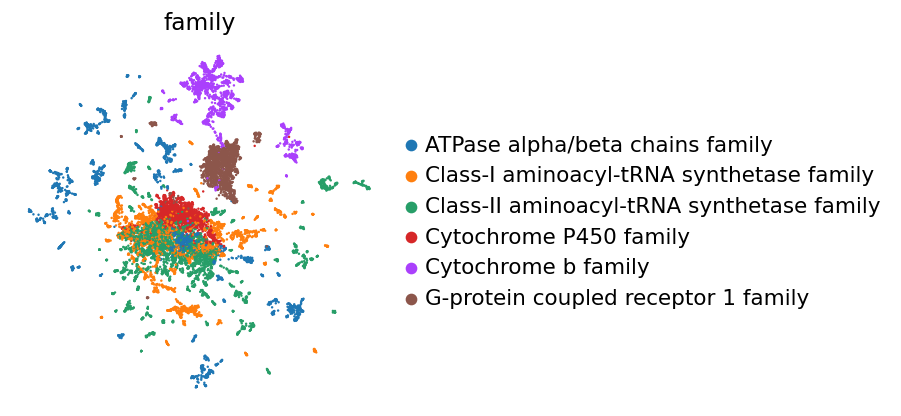

In [7]:
plot_umap(embeddings, subset['sequence'].values, subset['family'].values, method='avg')

Computing embedding vectors for 14150 protein sequences with 'sum' method...


100%|██████████| 14150/14150 [00:26<00:00, 531.59it/s]
         Falling back to preprocessing with `sc.pp.pca` and default params.


Embedding vectors has been sucessfully computed!
Visualizing...


/home/mohsen/projects/deeprot/venv/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
... storing 'family' as categorical


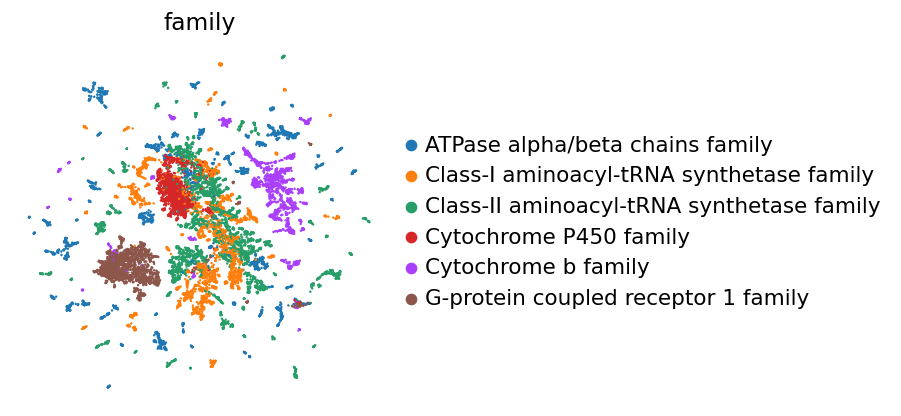

In [8]:
plot_umap(embeddings, subset['sequence'].values, subset['family'].values, method='sum')

## Congrats!

The notebook is available at https://github.com/Naghipourfar/molecular-biomechanics/